In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
import datetime 
%matplotlib inline
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

import matplotlib.pyplot as plt
%matplotlib inline

import platform
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from matplotlib import font_manager, rc
from matplotlib import style

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

# 십자인대, 아킬레스 카운트

In [3]:
df = pd.read_csv('nba_injury_1998.csv')
df.head()

,Date,Team,Relinquished,Notes,Notes2
0,1998-01-01,Celtics,Greg Minor,placed on IL with flu,flu
1,1998-01-02,Blazers,Dontonio Wingfield,placed on IR with left wrist tendinitis,left wrist tendinitis
2,1998-01-02,Bullets,Lorenzo Williams,placed on IL with flu / sore knees (P),flu / sore knees (P)
3,1998-01-02,Cavaliers,Mitchell Butler,placed on IL with herniated disc in neck,herniated disc in neck
4,1998-01-02,Mavericks,Chris Anstey,placed on IL with sprained left ankle,sprained left ankle


In [5]:
# 우선은 ACL과 아킬레스가 들어간  선수 구분
def yesno(x):
    words = x.split(' ')
    print(words)
    for word in words:
        if word.upper() in ['ACL', 'PCL', 'ACHILLES']:
            return True
            break   
df['tf'] = df['Notes2'].apply(lambda x:yesno(x))

['flu']
['left', 'wrist', 'tendinitis']
['flu', '/', 'sore', 'knees', '(P)']
['herniated', 'disc', 'in', 'neck']
['sprained', 'left', 'ankle']
['patella', 'tendinitis']
['flu']
['left', 'leg', 'stress', 'reaction']
['placed', 'in', 'IR', 'with', 'small', 'tear', 'in', 'right', 'hamstring']
['right', 'ankle', 'synovitis']
['sprained', 'right', 'foot']
['elbow', 'synovitis']
['sprained', 'right', 'ankle']
['sore', 'right', 'shoulder']
['hyperextended', 'left', 'knee']
['plantar', 'fasciitis', 'in', 'right', 'foot']
['strained', 'right', 'shoulder']
['left', 'knee', 'tendinitis']
['pulled', 'left', 'groin']
['fractured', 'left', 'clavicle', '(out', '6-8', 'weeks)']
['hamstring', 'injury', '(DNP)']
['sore', 'lower', 'back', '(DTD)']
['sprained', 'right', 'big', 'toe']
['strained', 'right', 'groin']
['flu']
['strained', 'right', 'calf']
['left', 'knee', 'tendinitis']
['broken', 'right', 'index', 'finger']
['surgery', 'on', 'left', 'knee', '(out', 'indefinitely)']
['patella', 'tendinitis']
[

['sore', 'left', 'knee']
['sprained', 'MCL', 'in', 'right', 'knee']
['bilateral', 'patellar', 'tendinitis']
['torn', 'ACL', 'in', 'left', 'knee']
['sprained', 'lower', 'back']
['back', 'spasms']
['right', 'Achilles', 'tendinitis']
['bruised', 'right', 'quadriceps']
['strained', 'lower', 'back']
['sore', 'back']
['bruised', 'right', 'knee']
['back', 'spasms']
['left', 'patella', 'tendinitis']
['fractured', 'left', 'wrist']
['strained', 'stomach', 'muscle']
['sprained', 'left', 'ankle']
['bone', 'bruise', 'in', 'right', 'ankle']
['sprained', 'right', 'shoulder']
['strained', 'left', 'calf']
['left', 'patella', 'tendinitis']
['sprained', 'right', 'ankle']
['left', 'knee', 'inflammation']
['placed', 'on', 'IL']
['sprained', 'left', 'big', 'toe']
['left', 'knee', 'tendinitis']
['patella', 'tendinitis']
['bone', 'chips', 'in', 'right', 'elbow']
['right', 'knee', 'tendinitis']
['sore', 'left', 'knee']
['broken', 'right', 'pinky', 'finger']
['strained', 'right', 'Achilles', 'tendon']
['broken'

['hyperextended', 'right', 'knee']
['sprained', 'right', 'ankle']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL', 'recovering', 'from', 'oral', 'surgery', 'to', 'remove', 'abscessed', 'wisdom', 'tooth']
['sprained', 'right', 'knee']
['left', 'calf', 'injury']
['sprained', 'right', 'ankle']
['placed', 'on', 'IL']
['sprained', 'left', 'big', 'toe']
['sprained', 'left', 'foot']
['sore', 'knee']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['torn', 'muscle', 'in', 'left', 'elbow']
['placed', 'on', 'IL', 'recovering', 'from', 'surgery', 'on', 'right', 'hand']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['back', 'injury']
['broken', 'left', 'wrist', '(out', 'for', 'season)']
['placed', 'on', 'IL']
['strained', 'lower', 'back']
['placed', 'on', 'IL']
['right', 'knee', 'injury']
['right', 'ankle', 'injury']
['placed', 'on', 'IL']
['sprained', 'left', 'knee']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['sprained', 'left', 'ankle']
['placed', 'on', 'IL']
['strained', '

['stomach', 'virus']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['separated', 'right', 'shoulder']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['sprained', 'left', 'hand']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['torn', 'lateral', 'meniscus', 'in', 'left', 'knee']
['placed', 'on', 'IL']
['sore', 'left', 'foot']
['placed', 'on', 'IL']
['scapula', 'injury']
['placed', 'on', 'IL']
['concussion', '(suffered', 'in', 'car', 'accident)']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['knee', 'injury']
['back', 'spasms']
['flu']
['placed', 'on', 'IL']
['broken', 'left', 'thumb']
['sprained', 'left', 'ankle']
['placed', 'on', 'IL']
['left', 'shoulder', 'injury']
['sprained', 'ligament', 'in', 'left', 'knee']
['placed', 'on', 'IL']
['back', 'spasms']
['sprained', 'right', 'ankle']
['placed', 'on', 'IL']

['placed', 'on', 'IL']
['right', 'calf', 'injury']
['placed', 'on', 'IL']
['sprained', 'right', 'ankle']
['sore', 'left/right', '(CBC)', 'knee']
['placed', 'on', 'IL']
['broken', 'right', 'thumb']
['back', 'spasms']
['placed', 'on', 'IL', 'strained', 'left', 'hamstring']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['sore', 'right', 'knee']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['sprained', 'right', 'big', 'toe']
['bruised', 'spinal', 'cord', '(out', 'for', 'season)']
['left', 'foot', 'injury']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['flu']
['placed', 'on', 'IL']
['strained', 'MCL', 'in', 'left', 'knee']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['sprained', 'left', 'ankle']
['hip', 'injury']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['ruptured', 'right', 'Achilles', 'tendon', '(out', 'for', 'season)']
[

['back', 'injury']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL', '(P)']
['placed', 'on', 'IL']
['strained', 'left', 'hamstring']
['right', 'foot', 'injury']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['upper', 'respiratory', 'infection']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL', 'recovering', 'from', 'surgery', 'on', 'right', 'leg', 'to', 'repair', 'fractured', 'tibia', '(out', 'for', 'season)']
['strained', 'left', 'calf']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['sore', 'lower', 'back']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['flu']
['flu']
['concussion']
['sore', 'lower', 'left', 'leg']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['right', 'finger', 'injury']
['chest', 'injury']
['placed', 'on', 'IL']
['sprained', 'right', 'ankle']
['p

['placed', 'on', 'IL']
['bone', 'bruise', 'in', 'left', 'knee']
['sprained', 'right', 'big', 'toe']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['concussion']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['sore', 'shoulder']
['sore/strained', 'left', 'Achilles']
['sore', 'left', 'knee']
['oral', 'surgery']
['sore', 'left', 'knee']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['strained', 'left', 'calf']
['bruised/sore', 'left', 'knee']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['sore', 'left', 'ankle']
['torn', 'meniscus', 'in', 'left', 'knee']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['bone', 'bruise', 'in', 'left', 'knee', '/', 'hyperextended', 'left', 'knee', '(Y)']
['placed', 'on', 'IL', 'for', 'rest']
['throat', 'ailment']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['right', 'foot', 'injury', '(DTD)']
['placed', 'on', 'IL']
['strained', '/', 'torn', '(

['concussion', '(DTD)']
['sore', 'right', 'knee']
['sprained', 'left', 'ankle']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['adductor', 'injury']
['concussion']
['back', 'spasms']
['placed', 'on', 'IL']
['bruised', 'left', 'quadricep']
['placed', 'on', 'IL']
['sore', 'ribs']
['strained', 'right', 'hip']
['sore', 'right', 'knee']
['placed', 'on', 'IL']
['sprained', 'right', 'knee']
['torn', 'pectoral', 'muscle']
['placed', 'on', 'IL']
['strained', 'left', 'hamstring']
['placed', 'on', 'IL']
['left', 'knee', 'injury']
['left', 'ankle', 'injury']
['strained', 'right', 'shoulder']
['sprained', 'right', 'wrist']
['sore', 'left', 'knee']
['placed', 'on', 'IL']
['right', 'hip', 'injury']
['placed', 'on', 'IL']
['sprained', 'left', 'ankle']
['illness']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['sprained', 'left', 'ankle']
['illness']
['right', 'adductor', 'injury']
['placed', 'on', 'IL']
['returned', 'to', 'lineup']
['placed', 'on', 'IL']
[

In [6]:
import re

# 시즌아웃 부상
def seasonout(x):
    words = re.split('\(|\)', x)
    print(words)
    for word in words:
        if word in ['out for season']:
            return True
            break
    
df['out']  = df['Notes2'].apply(lambda x:seasonout(x))
    

['flu']
['left wrist tendinitis']
['flu / sore knees ', 'P', '']
['herniated disc in neck']
['sprained left ankle']
['patella tendinitis']
['flu']
['left leg stress reaction']
['placed in IR with small tear in right hamstring']
['right ankle synovitis']
['sprained right foot']
['elbow synovitis']
['sprained right ankle']
['sore right shoulder']
['hyperextended left knee']
['plantar fasciitis in right foot']
['strained right shoulder']
['left knee tendinitis']
['pulled left groin']
['fractured left clavicle ', 'out 6-8 weeks', '']
['hamstring injury ', 'DNP', '']
['sore lower back ', 'DTD', '']
['sprained right big toe']
['strained right groin']
['flu']
['strained right calf']
['left knee tendinitis']
['broken right index finger']
['surgery on left knee ', 'out indefinitely', '']
['patella tendinitis']
['left knee tendinitis']
['left knee tendinitis']
['strained groin']
['strained abdomen & pulled groin']
['right ankle tendinitis']
['strained right hamstring']
['left knee patellar tendi

['left knee tendinitis']
['sprained left ankle']
['sprained right shoulder']
['sore right knee']
['bruised kidney']
['left quadriceps tendinitis']
['right knee injury']
['bruised right shoulder']
['back spasms']
['bone bruise in right foot']
['turf toe']
['left knee tendinitis']
['strained right hip flexor']
['sprained left ankle']
['back spasms']
['bruised left quadricep']
['placed on IL']
['back spasms']
['sprained right ankle']
['plantar fasciaitis in right foot']
['migraine headaches']
['thoracic spine dysfunction']
['sprained left foot']
['left Achilles tendinitis']
['placed on IL']
['sprained right ankle']
['sprained left ankle']
['flu-like symptoms']
['sprained right ankle']
['sore left hamstring']
['left knee tendinitis']
['strained right shoulder']
['strained lower back']
['sprained MCL in right knee']
['left ankle tendinitis']
['left hip pointer']
['sore right knee']
['right ankle injury']
['right knee swelling']
['placed on IL recovering from surgery on neck']
['placed on IL

['bulging disc in lower back ', 'out for season', '']
['bruised left knee']
['removal of wisdom teeth']
['sprained MCL in right knee']
['strained right groin']
['placed on IL']
['left shoulder injury']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['sprained left ankle']
['placed on IL']
['sprained right ankle']
['placed on IL']
['placed on IL']
['left ankle injury']
['sprained right ankle']
['placed on IL']
['placed on IL']
['placed on IL']
['sore left Achilles tendon']
['strained groin']
['right shoulder tendinitis']
['bruised left thigh']
['groin injury']
['placed on IL']
['back spasms']
['placed on IL']
['placed on IL']
['sore ankles']
['bruised left calf']
['placed on IL']
['sprained right ankle']
['placed on IL']
['migraine headache']
['placed on IL']
['lower back injury']
['elbow injury']
['right knee tendinitis']
['placed on IL']
['placed on IL']
['flu']
['plantar fasciitis in left foot']
['bruised left elbow']
['placed on IL']
['placed on IL']
['placed on

['flu']
['placed on IL recovering from surgery to repairbroken left cheekbone']
['placed on IL']
['placed on IL for rest']
['placed on IL']
['hip flexor injury']
['sore left ankle']
['bruised left calf']
['sprained left ankle/knee']
['sprained MCL in left knee']
['placed on IL']
['sprained right wrist ', 'out for season', '']
['strained groin']
['placed on IL']
['sore back']
['sore right shoulder']
['strained left shoulder']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL recovering from surgery on right foot ', 'out for season', '']
['sore right knee']
['placed on IL for rest']
['stomach flu']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['irregular heartbeat']
['placed on IL']
['placed on IL']
['broken right pinky finger ', 'out for season', '']
['placed on IL']
['placed on IL']
['calf injury']
['placed on IL']
['placed on IL']
['back spasms']
['sprained left ankle']
['broken left hand ', 'out for season', '']
['placed on IL']

['sore right knee']
['sprained left ankle']
['strained left calf']
['plantar fasciitis in right foot']
['sprained left ankle']
['recovering from surgery on left knee to repair torn meniscus']
['placed on IL ', 'date approximate', '']
['wrist injury']
['placed on IL']
['sore neck']
['right hip pointer']
['concussion']
['strained right calf']
['sore lower back']
['placed on IL']
['sore left ankle']
['strained left Achilles tendon']
['placed on IL for rest / sore left knee']
['placed on IL']
['placed on IL ', 'date approximate', '']
['strained left calf']
['placed on IL']
['placed on IL']
['strained lower back']
['sore right knee']
['placed on IL']
['left knee injury']
['sore right knee']
['sore right knee']
['placed on IL']
['placed on IL']
['sprained left ankle ', 'date approximate', '']
['right ankle injury']
['placed on IL']
['placed on IL']
['placed on IL']
['sprained right thumb']
['right thigh injury']
['placed on IL']
['left leg/ankle injury']
['placed on IL']
['bruised left quadr

['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['bruised left knee']
['bone bruise in left knee']
['placed on IL']
['sore lower back']
['strained left lower leg']
['placed on IL']
['sprained right ankle']
['dislocated left shoulder']
['placed on IL']
['strained left hamstring']
['placed on IL']
['calf injury']
['placed on IL']
['strained left calf']
['torn meniscus in right knee ', 'out for season', '']
['placed on IL']
['placed on IL']
['fractured right hand']
['hamstring injury']
['placed on IL']
['placed on IL ', 'not CBC', '']
['placed on IL']
['illness']
['sprained right ankle']
['bruised left knee']
['placed on IL']
['left knee injury']
['sore right knee']
['placed on IL']
['illness']
['concussion']
['right ankle injury']
['upper respiratory illness']
['placed on IL recovering from surgery on right knee to repair torn meniscus']
['bruised right hand']
['wrist injury']
['torn ACL in left knee ', 'out for season', '']
['hamstring injury / tendi

['placed on IL']
['placed on IL for rest']
['sprained left foot']
['placed on IL']
['sore right shoulder']
['sore lower back']
['placed on IL']
['sprained right wrist']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['illness']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL for rest']
['placed on IL']
['torn ACL in right knee']
['placed on IL']
['placed on IL']
['placed on IL for rest']
['back spasms']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['sore back']
['bone bruise in right knee']
['sprained right wrist']
['sore right ankle']
['placed on IL for rest']
['placed on IL']
['fractured fibula in left leg']
['placed on IL']
['placed on IL']
['sprained left ankle']
['plantar fasciitis in left foot ', 'DTD', '']
['placed on IL']
['sore left foot']
['placed on IL']
['placed on IL']
['sprained left ankle']
['bone bruise in left knee']
['right heel injury']
['sore left Achilles']
['placed on I

['sore left ankle']
['sprained left ankle']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['sore lower back']
['placed on IL']
['placed on IL']
['strained left groin']
['illness']
['strained left groin']
['right finger injury']
['placed on IL']
['sore right foot']
['illness']
['stiff neck']
['placed on IL']
['placed on IL']
['placed on IL']
['left thumb injury']
['bruised lower back']
['illness']
['placed on IL']
['placed on IL']
['left knee injury']
['sprained right ankle']
['sprained right ankle']
['sprained left ankle']
['placed on IL']
['bruised right knee']
['illness']
['upper respiratory infection']
['placed on IL']
['right eye injury']
['placed on IL']
['fractured right hand']
['placed on IL']
['right knee injury ', 'out for season', '']
['neck injury']
['neck injury']
['upper respiratory infection']
['right index finger injury']
['sore left ankle']
['left knee injury ', 'out for season', '']
['sore right shoulder']
['placed on IL']
['placed on IL']
['toe i

In [5]:
display(df[(df['out'] == True) | (df['tf'] == True)])
df[(df['out'] == True) | (df['tf'] == True)].shape

,Date,Team,Relinquished,Notes,Notes2,tf,out
42,1998-01-31,Bulls,Rusty LaRue,placed on IL with left Achilles tendinitis,left Achilles tendinitis,True,None
50,1998-02-18,Raptors,Chris Garner,placed on IL with right Achilles tendinitis,right Achilles tendinitis,True,None
55,1998-02-20,Celtics,Ronald Jones / Popeye Jones,placed on IR with torn left ACL (out for season),torn left ACL (out for season),True,True
75,1998-03-07,Bulls,Randy Brown,placed on IR with partially torn left Achilles...,partially torn left Achilles tendon,True,None
102,1998-04-03,Rockets,Matt Bullard,placed on IR with strained Achilles tendon,strained Achilles tendon,True,None
108,1998-04-09,Suns,Danny Manning,placed on IL with torn ACL in right knee (out ...,torn ACL in right knee (out for season),True,True
109,1998-04-11,Knicks,Ben Davis,placed on IL with left Achilles tendinitis,left Achilles tendinitis,True,None
114,1998-04-15,Nets,Jayson Williams,placed on IR with broken right thumb (out for ...,broken right thumb (out for season),None,True
144,1999-02-04,Hornets,Anthony Mason Sr.,placed on IR with ruptured right biceps tendon...,ruptured right biceps tendon (out for season),None,True
149,1999-02-04,Pistons,Christian Laettner,placed on IL with torn right Achilles tendon,torn right Achilles tendon,True,None


(796, 7)

In [7]:
def yesno2(x):
    words = x.split(' ')
    print(words)
    sum_sum = 0
    for word in words:
        if word.upper() in ['ACL', 'PCL', 'ACHILLES'] or word.upper() in['TORN','RUPTURE']:
            sum_sum += 1
        if sum_sum >= 2:
            return True
            break   
df['tf2'] = df['Notes2'].apply(lambda x:yesno2(x))

['flu']
['left', 'wrist', 'tendinitis']
['flu', '/', 'sore', 'knees', '(P)']
['herniated', 'disc', 'in', 'neck']
['sprained', 'left', 'ankle']
['patella', 'tendinitis']
['flu']
['left', 'leg', 'stress', 'reaction']
['placed', 'in', 'IR', 'with', 'small', 'tear', 'in', 'right', 'hamstring']
['right', 'ankle', 'synovitis']
['sprained', 'right', 'foot']
['elbow', 'synovitis']
['sprained', 'right', 'ankle']
['sore', 'right', 'shoulder']
['hyperextended', 'left', 'knee']
['plantar', 'fasciitis', 'in', 'right', 'foot']
['strained', 'right', 'shoulder']
['left', 'knee', 'tendinitis']
['pulled', 'left', 'groin']
['fractured', 'left', 'clavicle', '(out', '6-8', 'weeks)']
['hamstring', 'injury', '(DNP)']
['sore', 'lower', 'back', '(DTD)']
['sprained', 'right', 'big', 'toe']
['strained', 'right', 'groin']
['flu']
['strained', 'right', 'calf']
['left', 'knee', 'tendinitis']
['broken', 'right', 'index', 'finger']
['surgery', 'on', 'left', 'knee', '(out', 'indefinitely)']
['patella', 'tendinitis']
[

['sprained', 'right', 'ankle']
['strained', 'left', 'rotator', 'cuff']
['strained', 'lower', 'back']
['right', 'knee', 'patella', 'tendinitis']
['sprained', 'right', 'foot']
['sprained', 'left', 'ankle']
['strained', 'left', 'knee']
['swelling', 'in', 'left', 'knee']
['sprained', 'left', 'ankle']
['right', 'knee', 'patella', 'tendinitis']
['left', 'knee', 'tendinitis']
['left', 'foot', 'injury']
['right', 'knee', 'tendinitis']
['strained', 'right', 'hip']
['left', 'knee', 'patella', 'tendinitis']
['inflammed', 'disc', 'in', 'lower', 'back']
['bruised', 'right', 'knee']
['left', 'knee', 'patella', 'tendinitis']
['strained', 'left', 'hamstring']
['right', 'knee', 'tendinitis']
['left', 'knee', 'tendinitis']
['left', 'Achilles', 'tendinitis']
['lower', 'back', 'pain']
['dislocated', 'right', 'kneecap']
['back', 'spasms']
['right', 'knee', 'tendinitis']
['sprained', 'right', 'ankle']
['left', 'knee', 'tendinitis']
['right', 'patella', 'tendinitis']
['strained', 'lower', 'back']
['left', 'h

['placed', 'on', 'IL']
['right', 'knee', 'tendinitis']
['separated', 'shoulder']
['sprained', 'right', 'thumb']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['right', 'knee', 'injury']
['sprained', 'left', 'big', 'toe']
['placed', 'on', 'IL']
['placed', 'on', 'IL', 'for', 'not', 'meeting', 'team', 'conditioning', 'standards']
['placed', 'on', 'IL', 'for', 'not', 'meeting', 'team', 'conditioning', 'standards']
['sprained', 'right', 'ankle']
['sprained', 'right', 'ankle']
['flu']
['left', 'ankle', 'injury']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['sore', 'back']
['placed', 'on', 'IL']
['strained', 'lower', 'back']
['suspension']
['placed', 'on', 'IL']
['sore', 'lower', 'back']
['placed', 'on', 'IL']
['sprained', 'right', 'ankle']
['foot', 'injury', '(ankle', 'per', 'CBC)']
['strained', 'groin']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['knee', 'injury']
['placed', 'on', 'IL']
['placed

['sports', 'hernia', '(out', 'for', 'season)']
['torn', 'ligament', 'in', 'left', 'ankle']
['placed', 'on', 'IL']
['swollen', 'left', 'ankle']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['sprained', 'right', 'wrist']
['placed', 'on', 'IL']
['placed', 'on', 'IL', '(out', 'for', 'season)']
['placed', 'on', 'IL']
['placed', 'on', 'IL', '(out', 'for', 'season)']
['placed', 'on', 'IL']
['sore', 'left', 'ankle']
['placed', 'on', 'IL', 'recovering', 'from', 'microfracture', 'surgery', 'on', 'left', 'knee']
['placed', 'on', 'IL', 'recovering', 'from', 'surgery', 'on', 'left', 'hip']
['torn', 'cartilage', 'in', 'right', 'shoulder']
['broken', 'right', 'foot']
['placed', 'on', 'IL']
['placed', 'on', 'IL', 'recovering', 'from', 'surgery', 'on', 'right', 'knee']
['broken', 'right', 'thumb']
['sore', 'right', 'ankle']
['stress', 'fracture', 'in', 'left', 'kneecap', '(out', 'for', 'season)']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL', 'recovering', 'from', 'arthroscopic',

['placed', 'on', 'IL']
['placed', 'on', 'IL', '(F)']
['placed', 'on', 'IL']
['placed', 'on', 'IL', '(F)']
['upper', 'respiratory', 'infection']
['placed', 'on', 'IL', '(F)', '(date', 'approximate)']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['left', 'elbow', 'injury']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['Achilles', 'tendon', 'injury']
['strained', 'right', 'calf']
['rib', 'injury', '/', 'flu', '(CBC)']
['concussion']
['placed', 'on', 'IL', '(P)']
['placed', 'on', 'IL']
['calf', 'injury']
['strained', 'left', 'Achilles', 'tendon']
['strained', 'left', 'shoulder']
['illness/flu']
['left', 'knee', 'tendinitis', '(F)']
['bruised', 'hip', '/', 'back', 'injury', '(CBC)']
['strained', 'lower', 'back', '(F)']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['left', 'knee', 'injury']
['placed', 'on', 'IL']
['knee', 'injury']
['placed', 'on', 'IL', '(F)']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['concussion']

['placed', 'on', 'IL', 'for', 'rest']
['strained', 'left', 'groin']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL', 'for', 'rest']
['placed', 'on', 'IL', 'for', 'rest']
['strained', 'hamstring']
['sprained', 'left', 'ankle']
['stress', 'reaction', 'in', 'right', 'ankle']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['ankle', 'injury']
['sprained', 'right', 'ankle']
['sprained', 'right', 'ankle']
['placed', 'on', 'IL']
['placed', 'on', 'IL', '(P)', '(out', 'for', 'season)']
['placed', 'on', 'IL']
['sore/strained', 'left', 'knee']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL', 'for', 'rest']
['placed', 'on', 'IL']
['sprained', 'right', 'wrist']
['placed', 'on', 'IL']
['placed', 'on', 'IL', 'recovering', 'from', 'surgery', 'on', 'right', 'knee', 'to', 'repair', 'torn', 'ACL', '(out', 'for', 'season)']
['illness']
['strained', 'left', 'calf']
['left', 'knee', 'injury']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed'

['fractured', 'hand/wrist']
['placed', 'on', 'IL']
['strained', 'right', 'shoulder']
['fractured', 'tibia', 'in', 'left', 'leg', 'and', 'dislocated', 'left', 'ankle', '(out', 'for', 'season)']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['strained', 'right', 'quadriceps']
['placed', 'on', 'IL']
['illness']
['placed', 'on', 'IL']
['sprained/strained', 'left', 'shoulder']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL', 'recovering', 'from', 'surgery', 'on', 'separated', 'left', 'shoulder']
['placed', 'on', 'IL']
['right', 'hamstring', 'injury']
['placed', 'on', 'IL']
['placed', 'on', 'IL', 'recovering', 'from', 'surgery', '/', 'rehab', 'of', 'knees']
['placed', 'on', 'IL']
['placed', 'on', 'IL', 'recovering', 'from', 'oral', 'surgery']
['fractured', 'left', 'hand']
['placed', 'on', 'IL']
['strained', 'right', 'hamstring']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['knee', 'injury']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 

['hip', 'injury']
['illness']
['sore', 'left', 'foot']
['placed', 'on', 'IL']
['right', 'hip', 'injury']
['sprained', 'left', 'wrist']
['sore', 'left', 'shoulder']
['sprained', 'left', 'ankle']
['back', 'spasms']
['sore', 'left', 'heel']
['bruised', 'right', 'ankle']
['sore', 'back']
['left', 'hamstring', 'injury']
['sprained', 'right', 'thumb']
['placed', 'on', 'IL', 'for', 'personal', 'reasons']
['placed', 'on', 'IL']
['strained', 'left', 'calf']
['strained', 'right', 'hamstring']
['sore', 'back']
['placed', 'on', 'IL']
['illness']
['sprained', 'neck']
['sprained', 'left', 'ankle']
['sore', 'left', 'ankle']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['sprained', 'right', 'elbow']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['illness']
['strained', 'left', 'hip']
['bruised', 'left', 'hip']
['illness']
['sore', 'left', 'foot']
['sprained', 'right', 'ankle']
['left', 'wrist', 'injury']
['right', 'hamstring', 'injury']
['sore', 'right', 'elbow']
['placed', 'on

In [8]:
def oneOrzero(x):
    two=0
    three=0
    if x['out'] == True:
        two = 1
    if  x['tf2'] == True:
        three = 1
    print(two, three)    
    return  pd.Series([two,three])
df[['outnum','tf2num']] = df[['out','tf2']].apply(oneOrzero,axis=1)

0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0


0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
1 0
0 0
1 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
1 0
1 0
0 0
1 0
0 0
1 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 0
0 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
1 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
0 0


0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
1 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
1 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
0 0
0 0
0 0
1 0
0 0
0 0
1 0
0 0
1 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
1 0
0 0
1 0
0 0
0 0
0 0
1 0
0 0
0 0
1 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
1 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
1 0
1 1
1 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


In [9]:
df_sum = df.groupby('Relinquished',as_index=False).agg({'outnum':'sum','tf2num':'sum'})

# 다른 데이터들과 합치기

In [10]:
injury_df = pd.read_csv('nba_injury_merge_position.csv')

injury_df.head()

,name,age,season,Notes,position
0,Tony Parker,37,18,50.0,G
1,Manu Ginobili,41,16,44.0,G
2,Dwyane Wade,37,16,43.0,G
3,Andrew Bogut,36,14,36.0,C
4,Sean Marks,36,11,35.0,F-C


In [11]:
df_merge1 = pd.merge(df_sum,injury_df,left_on='Relinquished',right_on='name').drop('name',axis=1)
df_merge1.head()

,Relinquished,outnum,tf2num,age,season,Notes,position
0,Aaron Brooks,0,0,35,10,9.0,G
1,Aaron Gray,0,0,30,7,14.0,C
2,Adam Morrison,1,1,29,3,8.0,F
3,Adonal Foyle,1,0,35,12,18.0,C
4,Al Harrington,0,1,35,16,15.0,F


In [12]:
nba_all = pd.read_csv('all_seasons.csv').drop('Unnamed: 0',axis=1)
nba_all.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,24,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,58,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,9,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,10,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


In [13]:
import math
# 평균을 구하고 모두 소수 2번쨰까지만 살리기
nba_all_group = nba_all.groupby('player_name',as_index=False).mean()
for i in range(nba_all_group.shape[0]):
    for i2 in range(len(list(nba_all_group.columns))):
        if i2 == 0:
            continue
        elif i2 == 1:
            nba_all_group.iloc[i,i2] =  nba_all_group.iloc[i,i2].astype('int64')
        else:
            nba_all_group.iloc[i,i2] = round(nba_all_group.iloc[i,i2],2)

nba_all_group['age'] = nba_all_group['age'].astype('int64')
nba_all_group.head()

,player_name,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,A.C. Green,35,205.74,102.06,75.80,5.78,6.06,0.86,-1.88,0.09,0.19,0.13,0.49,0.05
1,A.J. Bramlett,23,208.28,102.97,8.00,1.00,2.80,0.00,-32.60,0.16,0.21,0.15,0.19,0.00
2,A.J. Guyton,24,185.42,81.65,26.67,3.80,0.70,1.57,-6.70,0.01,0.04,0.22,0.32,0.28
3,AJ Hammons,24,213.36,117.93,22.00,2.20,1.60,0.20,-0.60,0.05,0.20,0.17,0.47,0.04
4,AJ Price,25,187.96,84.82,43.50,5.35,1.33,2.00,-2.23,0.02,0.09,0.21,0.48,0.25


In [14]:
df_merge = pd.merge(df_merge1,nba_all_group,left_on='Relinquished',right_on='player_name',how='left').\
drop('age_y',axis=1).rename(columns={'age_x':'age'})

df_merge.drop('player_name',axis=1,inplace=True)

df_merge['Notes'] = df_merge['Notes'].astype(int)
df_merge.head()

,Relinquished,outnum,tf2num,age,season,Notes,position,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,Aaron Brooks,0,0,35,10,9,G,182.88,73.03,64.50,8.88,1.55,2.76,-3.31,0.02,0.07,0.22,0.52,0.23
1,Aaron Gray,0,0,30,7,14,C,213.36,122.47,45.43,3.24,3.73,0.66,-4.73,0.13,0.23,0.15,0.53,0.09
2,Adam Morrison,1,1,29,3,8,F,203.20,92.99,53.67,6.07,1.80,1.17,-7.83,0.03,0.10,0.19,0.44,0.11
3,Adonal Foyle,1,0,35,12,18,C,208.28,118.88,61.08,3.78,4.48,0.44,-4.40,0.11,0.19,0.13,0.50,0.04
4,Al Harrington,0,1,35,16,15,F,205.74,112.49,61.31,12.20,5.13,1.52,-1.45,0.06,0.17,0.23,0.51,0.10


# 다중회귀 분석 하기

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr_model = LinearRegression()

(157, 19)


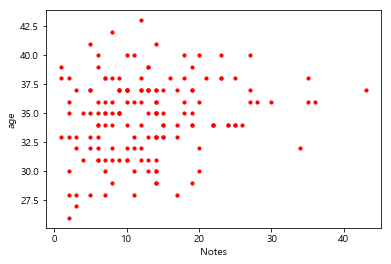

In [17]:
print(df_merge.shape)
df_merge.plot(kind='scatter',x='Notes',y='age',c='red',s=10)
plt.show()

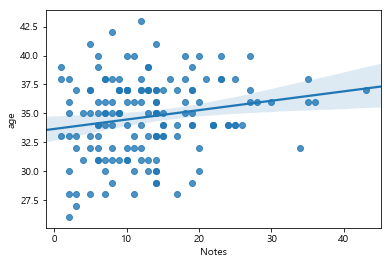

In [18]:
sns.regplot(x='Notes',y='age',data=df_merge)
plt.show()

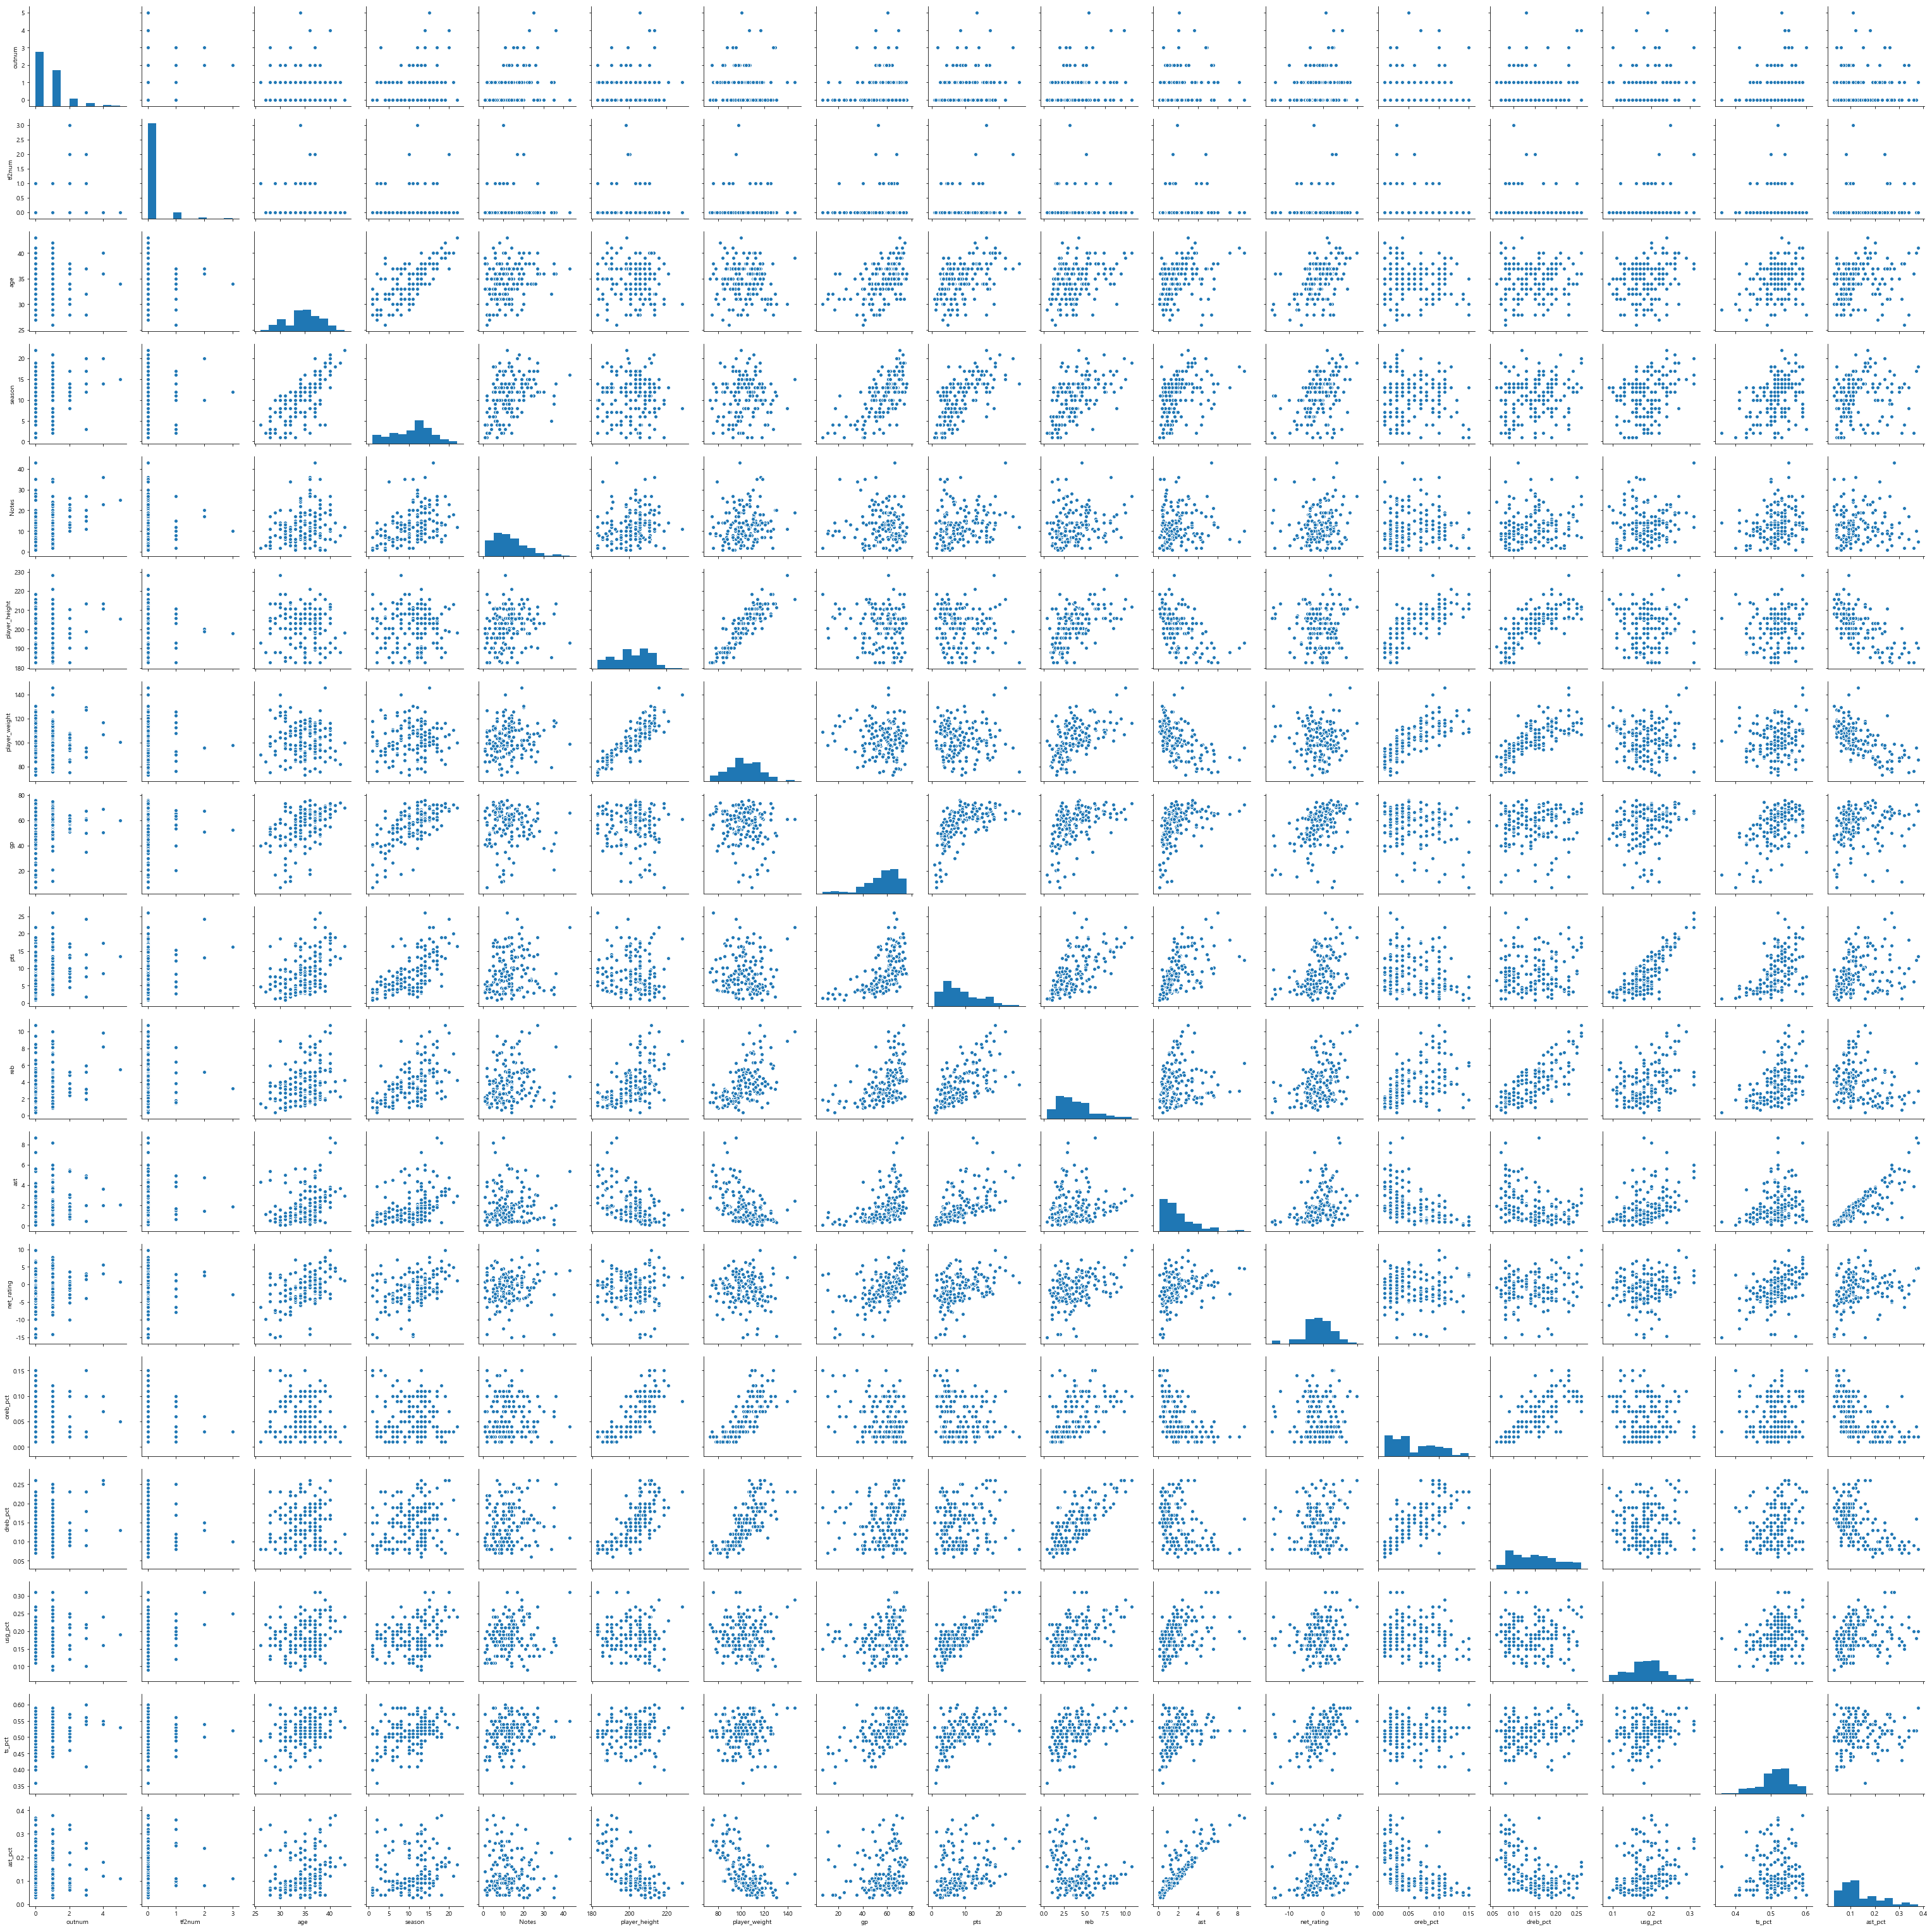

In [19]:
sns.pairplot(df_merge)
plt.show()

In [20]:
X = df_merge.drop(['age','Relinquished','position'],axis=1)
y = df_merge['age']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=10)

In [22]:
print(f'X_train : {len(X_train)}\nX_test : {len(X_test)}')

X_train : 125
X_test : 32


In [23]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(df_merge['position'])
digit = encoder.transform(df_merge['position'])
df_merge['position_label'] = digit

In [24]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [25]:
r_square = lr_model.score(X_test, y_test)
print(f'결정계수 : {r_square}')

결정계수 : 0.010717208899175601


In [26]:
print('기울기 : ', lr_model.coef_)
print('졀편 : ', lr_model.intercept_)

기울기 :  [-0.59741338 -0.17372362  0.72034263 -0.05059755  0.03156386 -0.03173942
 -0.05520738 -0.2687733  -0.06240254  0.27431276  0.13490803 -6.37236761
  2.63279318 23.39659172 13.48569785 -6.493875  ]
졀편 :  19.634348024790757


In [27]:
y_pred = lr_model.predict(X)

In [28]:
data_pre = pd.DataFrame({
        '예측값' : np.ravel(y_pred),
        '실제값' : y
})
data_pre.head()

,예측값,실제값
0,34.826186,35
1,32.596587,30
2,28.376485,29
3,33.754659,35
4,38.062907,35


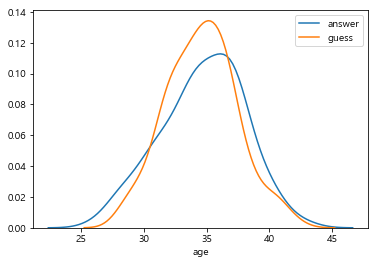

In [29]:
sns.distplot(y, hist=False, label='answer')
sns.distplot(y_pred, hist=False, label='guess')
plt.show()